# 4.2 Demo: *melt()* To Change Wide Shape to Tall/Long  

- Datafile:  *Demo_Data_4.2_melt.csv*   


- Often used for Grouped and Stacked Bar Charts &  Multi Line Charts    
- We only need to do this if the data is not in the correct shape already!   
- If it's not, we use the *melt()* function to change its shape -- without changing the actual data values.  
- The shape plotly express wants is called **Tall/Long**   
- The data is currently in a **Wide** shape  
- We will use the pandas *melt()* function to reshape it from Wide to Tall so that we can plot it.  


- This is a part of being "Tidy" Data: (https://vita.had.co.nz/papers/tidy-data.pdf)  



In [2]:
import pandas as pd
import plotly.express as px

### Read Data file  


In [3]:
df = pd.read_csv("Data/GM_LifeExpectancy_melted.csv")

print(df.shape)
df

(56889, 3)


country  Year  Life Expectancy
0               Afghanistan  1799             28.2
1                    Angola  1799             27.0
2                   Albania  1799             35.4
3                   Andorra  1799              NaN
4      United Arab Emirates  1799             30.7
...                     ...   ...              ...
56884                 Samoa  2099             83.9
56885                 Yemen  2099             78.4
56886          South Africa  2099             79.8
56887                Zambia  2099             78.1
56888              Zimbabwe  2099             75.7

[56889 rows x 3 columns]

In [4]:
df.dtypes

country             object
Year                 int64
Life Expectancy    float64
dtype: object

In [5]:
df_selected_country = df.query("country == 'Ireland'")

print(df_selected_country.shape)
df_selected_country.head()

(301, 3)


country  Year  Life Expectancy
79   Ireland  1799             38.3
268  Ireland  1800             38.3
457  Ireland  1801             38.3
646  Ireland  1802             38.3
835  Ireland  1803             38.3

In [6]:
df_selected_country2 = df_selected_country.query(" Year >= 1800 ")

print(df_selected_country2.shape)
df_selected_country2.head()

(300, 3)


country  Year  Life Expectancy
268   Ireland  1800             38.3
457   Ireland  1801             38.3
646   Ireland  1802             38.3
835   Ireland  1803             38.3
1024  Ireland  1804             38.3

In [10]:
df_selected_country3 = df_selected_country2.query(" Year <= 2020 ")

print(df_selected_country3.shape)
df_selected_country3.head()

(221, 3)


country  Year  Life Expectancy
268   Ireland  1800             38.3
457   Ireland  1801             38.3
646   Ireland  1802             38.3
835   Ireland  1803             38.3
1024  Ireland  1804             38.3

# Use *melt()* to change Dataframe Shape from Wide to Tall/Long

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Durable_Goods']"

(113778, 3)


<ipython-input-21-ddf3abda17d9>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_melt = df.melt(id_vars=['country'],


country  Year  Life Expectancy
0           Afghanistan  Year           1799.0
1                Angola  Year           1799.0
2               Albania  Year           1799.0
3               Andorra  Year           1799.0
4  United Arab Emirates  Year           1799.0
5             Argentina  Year           1799.0
6               Armenia  Year           1799.0
7   Antigua and Barbuda  Year           1799.0
8             Australia  Year           1799.0
9               Austria  Year           1799.0

# Plot

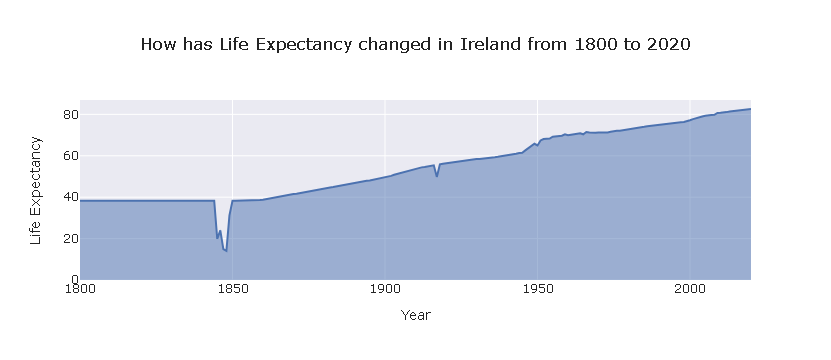

In [11]:
fig = px.area(df_selected_country3, 
             x='Year', 
             y='Life Expectancy', 
             template='seaborn',
             title='How has Life Expectancy changed in Ireland from 1800 to 2020')

fig.show()

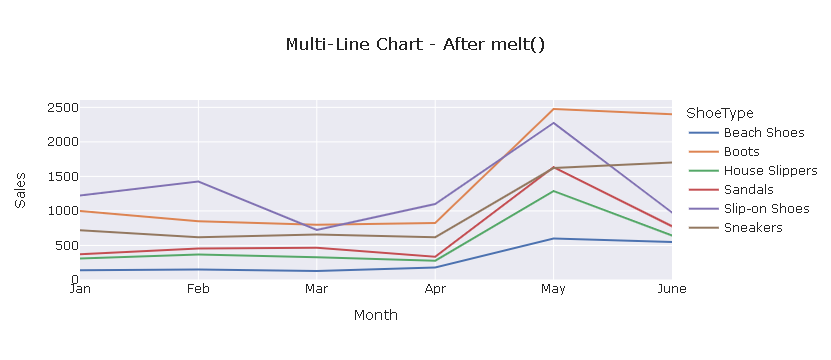

In [8]:
fig = px.line(df_melt, 
             x='Month', 
             y='Sales',
             color = 'ShoeType',
             template='seaborn',
             title='Multi-Line Chart - After melt()'
             )

fig.show()